# Multivariate Normal Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

np.random.seed(0)

Note to self: The following are just _points_ that are distributed in the $x$-$y$ plane. But if one is interested in fitting a 2D gaussian, which is a function of two variables that returns a scalar: $z \sim f(x,y|\theta)$. What is plotted below are the **inputs** but what we would like to see is a projection of the inputs and the **output** which is a 3D visualization

Text(0, 0.5, '$y$')

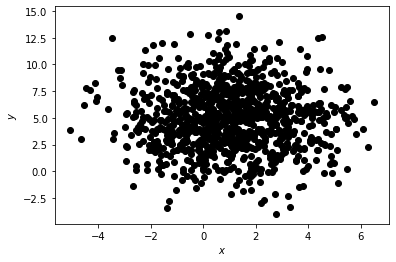

In [2]:
means = [1, 5]
std_devs = np.array([2, 3])
covariance = np.diag(std_devs ** 2)
n_samples = 1000

x, y = np.random.multivariate_normal(means, covariance, n_samples).T

fig, ax = plt.subplots()
ax.scatter(x, y, color="black")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

Try again following this example: https://stackoverflow.com/questions/21566379/fitting-a-2d-gaussian-function-using-scipy-optimize-curve-fit-valueerror-and-m

In [13]:
# Create x and y indices
x_range = [-15, 15]
y_range = [-15, 15]
n_samples = 1000
x, y = np.meshgrid(
    np.linspace(*x_range, n_samples + 1), np.linspace(*y_range, n_samples + 1)
)

In [4]:
def model(inputs, amplitude, mean_x, mean_y, sigma_x, sigma_y, offset):
    """
    2D Normal with offset
    Returns 1d array
    """
    (x, y) = inputs
    z = offset + amplitude * np.exp(
        -(((mean_x - x) / sigma_x) ** 2 + ((mean_y - y) / sigma_y) ** 2) / 2
    )
    return z.ravel()

In [14]:
observations = model(
    (x, y),
    amplitude=10,
    mean_x=means[0],
    mean_y=means[1],
    sigma_x=std_devs[0],
    sigma_y=std_devs[1],
    offset=10,
)
noise = 0.2 * np.random.normal(size=observations.shape)
data = observations + noise

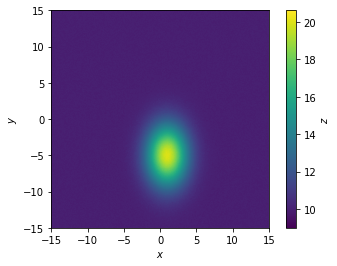

In [15]:
fig, ax = plt.subplots()
im = ax.imshow(data.reshape(x.shape), extent=(x.min(), x.max(), y.min(), y.max()))
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
fig.colorbar(im, label=r"$z$");

In [16]:
# init_params = (3,0,0,1,1,1)
# init_params = (10, means[0], means[1], std_devs[0],std_devs[1],10)
# params_opt, params_cov = optimize.curve_fit(model, (x, y), data, p0=init_params)

params_opt, params_cov = optimize.curve_fit(model, (x, y), data)

In [17]:
model_predictions = model((x, y), *params_opt)

In [18]:
print("True paramters:")
# amplitude=10, mean_x=means[0], mean_y=means[1], sigma_x=std_devs[0], sigma_y=std_devs[1], offset=10
for param in (10, means[0], means[1], std_devs[0], std_devs[1], 10):
    print(f"  {param}")

print("\nBest fit parameters")
for param in params_opt:
    print(f"  {param}")

True paramters:
  10
  1
  5
  2
  3
  10

Best fit parameters
  9.996038990900749
  0.9996958489068454
  4.99969713314987
  2.0000156367111246
  3.000751023944315
  10.000387909377269


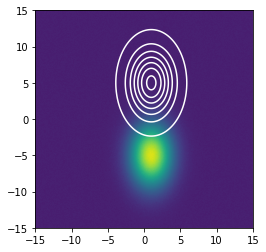

In [19]:
fig, ax = plt.subplots()
ax.imshow(data.reshape(x.shape), extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, model_predictions.reshape(x.shape), 8, colors="white")

---

In [ ]:
# Play with SciPy Stats

from scipy.stats import multivariate_normal

In [ ]:
# https://scipy-cookbook.readthedocs.io/items/FittingData.html#Fitting-a-2D-gaussian
from scipy import optimize


def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x, y: height * np.exp(
        -(((center_x - x) / width_x) ** 2 + ((center_y - y) / width_y) ** 2) / 2
    )


def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments"""
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X * data).sum() / total
    y = (Y * data).sum() / total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size) - x) ** 2 * col).sum() / col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size) - y) ** 2 * row).sum() / row.sum())
    height = data.max()
    return height, x, y, width_x, width_y


def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) - data)
    p, success = optimize.leastsq(errorfunction, params)
    return p


Xin, Yin = np.mgrid[0:201, 0:201]
data = gaussian(3, 100, 100, 20, 40)(Xin, Yin) + np.random.random(Xin.shape)

params = fitgaussian(data)
fit = gaussian(*params)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(data, cmap=plt.cm.gist_earth_r)

ax.contour(fit(*np.indices(data.shape)), cmap=plt.cm.copper)
(height, x, y, width_x, width_y) = params

ax.text(
    0.95,
    0.05,
    """
x : %.1f
y : %.1f
width_x : %.1f
width_y : %.1f"""
    % (x, y, width_x, width_y),
    fontsize=16,
    horizontalalignment='right',
    verticalalignment='bottom',
    transform=ax.transAxes,
)

print("Best fit model parameters:")
for name, par in zip(["height", "mean_x", "mean_y", "width_x", "width_y"], params):
    print(f"  {name}: {par:0.5f}")

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])

sigma = np.array([0.5, 0.5])
covariance = np.diag(sigma ** 2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)
# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)

# fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# ax.plot_wireframe(x,y,z)

In [ ]:
# https://stackoverflow.com/questions/21566379/fitting-a-2d-gaussian-function-using-scipy-optimize-curve-fit-valueerror-and-m
def twoD_Gaussian(inputs, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x, y) = inputs
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta) ** 2) / (2 * sigma_x ** 2) + (np.sin(theta) ** 2) / (
        2 * sigma_y ** 2
    )
    b = -(np.sin(2 * theta)) / (4 * sigma_x ** 2) + (np.sin(2 * theta)) / (
        4 * sigma_y ** 2
    )
    c = (np.sin(theta) ** 2) / (2 * sigma_x ** 2) + (np.cos(theta) ** 2) / (
        2 * sigma_y ** 2
    )
    g = offset + amplitude * np.exp(
        -(a * ((x - xo) ** 2) + 2 * b * (x - xo) * (y - yo) + c * ((y - yo) ** 2))
    )
    return g.ravel()


# Create x and y indices
x = np.linspace(-50, 50, 201)
y = np.linspace(-50, 50, 201)
x, y = np.meshgrid(x, y)

# create data
data = twoD_Gaussian((x, y), 3, 10, -5, 5, 6, 0, 10)

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(201, 201))
plt.colorbar()

# add some noise to the data and try to fit the data generated beforehand
initial_guess = (3, 10, -5, 5, 6, 0, 10)

data_noisy = data + 0.2 * np.random.normal(size=data.shape)

popt, pcov = optimize.curve_fit(twoD_Gaussian, (x, y), data_noisy, p0=initial_guess)

data_fitted = twoD_Gaussian((x, y), *popt)

fig, ax = plt.subplots()
ax.imshow(data_noisy.reshape(201, 201), extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(201, 201), 8, colors="white")